In [5]:
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import os

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            PATH = os.path.join('logs', NAME)
            tensorboard = TensorBoard(log_dir=PATH)

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            
            IMG_SIZE = 50

            X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

            y = np.array(y)

            history= model.fit(X, y,
                      batch_size=32,
                      epochs=5,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('64x3-CNN.model')

1-conv-32-nodes-0-dense-1592647106
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 4s 3ms/sample - loss: 0.3211 - accuracy: 0.8520 - val_loss: 0.1392 - val_accuracy: 0.9516
Epoch 2/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.1548 - accuracy: 0.9464 - val_loss: 0.1004 - val_accuracy: 0.9594
Epoch 3/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0997 - accuracy: 0.9632 - val_loss: 0.0715 - val_accuracy: 0.9782
Epoch 4/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0872 - accuracy: 0.9658 - val_loss: 0.0627 - val_accuracy: 0.9828
Epoch 5/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0647 - accuracy: 0.9772 - val_loss: 0.0582 - val_accuracy: 0.9797
2-conv-32-nodes-0-dense-1592647122
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.4605 - accuracy: 0.7696 - val_lo

Epoch 4/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0636 - accuracy: 0.9759 - val_loss: 0.0534 - val_accuracy: 0.9828
Epoch 5/5
1493/1493 [==============================] - 3s 2ms/sample - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.0593 - val_accuracy: 0.9828
2-conv-32-nodes-1-dense-1592647666
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.4559 - accuracy: 0.7582 - val_loss: 0.2029 - val_accuracy: 0.9501
Epoch 2/5
1493/1493 [==============================] - 5s 3ms/sample - loss: 0.1384 - accuracy: 0.9457 - val_loss: 0.0988 - val_accuracy: 0.9626
Epoch 3/5
1493/1493 [==============================] - 5s 3ms/sample - loss: 0.0827 - accuracy: 0.9672 - val_loss: 0.0660 - val_accuracy: 0.9782
Epoch 4/5
1493/1493 [==============================] - 5s 3ms/sample - loss: 0.0715 - accuracy: 0.9752 - val_loss: 0.0707 - val_accuracy: 0.9797
Epoch 5/5
1493/1493 [===========================

1493/1493 [==============================] - 8s 5ms/sample - loss: 0.4758 - accuracy: 0.7575 - val_loss: 0.2253 - val_accuracy: 0.9579
Epoch 2/5
1493/1493 [==============================] - 8s 5ms/sample - loss: 0.1307 - accuracy: 0.9511 - val_loss: 0.0853 - val_accuracy: 0.9704
Epoch 3/5
1493/1493 [==============================] - 5s 4ms/sample - loss: 0.0917 - accuracy: 0.9618 - val_loss: 0.0656 - val_accuracy: 0.9797
Epoch 4/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.0658 - accuracy: 0.9725 - val_loss: 0.0584 - val_accuracy: 0.9813
Epoch 5/5
1493/1493 [==============================] - 6s 4ms/sample - loss: 0.0704 - accuracy: 0.9705 - val_loss: 0.0605 - val_accuracy: 0.9782
3-conv-32-nodes-2-dense-1592648269
Train on 1493 samples, validate on 641 samples
Epoch 1/5
1493/1493 [==============================] - 8s 5ms/sample - loss: 0.5586 - accuracy: 0.7274 - val_loss: 0.4667 - val_accuracy: 0.7629
Epoch 2/5
1493/1493 [==============================] - 6s 

In [6]:
history.history


{'loss': [0.3917390974232277,
  0.13779481766871454,
  0.13946638387900498,
  0.06384655412308976,
  0.05409649849575505],
 'accuracy': [0.8218352, 0.95043534, 0.9511052, 0.9799062, 0.98057604],
 'val_loss': [0.22780730634457003,
  0.1261346095341767,
  0.08755396954989854,
  0.05397099095447822,
  0.10937504961845325],
 'val_accuracy': [0.91419655, 0.9625585, 0.9609984, 0.9828393, 0.9609984]}

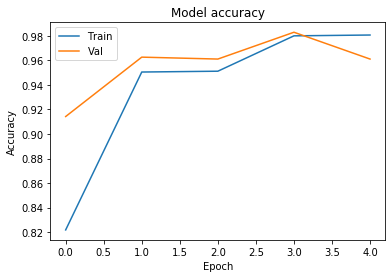

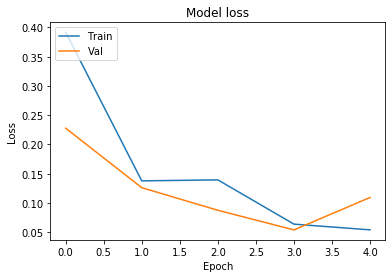

In [7]:
import matplotlib.pyplot as plt
#plot training validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#plot training validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()